## Metacritic Analysis of Movies, TV, Music and Games

Check the description of the dataset [here](https://www.kaggle.com/datasets/patkle/metacritic-scores-for-games-movies-tv-and-music)

You might interested to know about metascore - https://www.metacritic.com/about-metascores

### Import Libraries and Dataset

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

<IPython.core.display.Javascript object>

In [3]:
movies = pd.read_csv("data/movies.csv")
tvs = pd.read_csv("data/tv.csv")
music = pd.read_csv("data/music.csv")
games = pd.read_csv("data/games.csv")

<IPython.core.display.Javascript object>

### Movies Analysis

In [4]:
movies.head(10)

,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,549123,94,TV-14,"July 26, 1989",101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,"December 8, 2000",102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,"September 11, 1970",103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,"January 15, 1943",104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,"June 19, 2015",105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7
5,500084,94,R,"October 22, 2004",106,Two old friends set off on a wine-tasting road...,Sideways,7
6,553537,94,Passed,"January 1, 1945",107,Young love and childish fears highlight a year...,Meet Me in St. Louis,6.7
7,550723,94,TV-PG,"June 15, 1960",108,A man tries to rise in his company by letting ...,The Apartment,7.9
8,520814,94,R,"August 15, 1979",109,"During the Vietnam War, Captain Willard is sen...",Apocalypse Now,8.7
9,549340,94,TV-PG,"June 23, 1950",110,Notorious gunfighter Jimmy Ringo rides into to...,The Gunfighter,6.8


<IPython.core.display.Javascript object>

In [5]:
movies["rating"].value_counts()

R            4938
Not Rated    3429
PG-13        2580
PG           1472
Unrated       442
TV-MA         260
G             230
NR            154
TV-14         149
TV-PG         140
Approved      134
Passed         94
NC-17          60
TV-G           40
X              23
GP             23
M               9
M/PG            8
Open            6
PG--13          5
TV-Y7           2
MA-17           1
PG-13`          1
TV-Y7-FV        1
Name: rating, dtype: int64

<IPython.core.display.Javascript object>

### Overview:

Based on the ratings R, PG-13 and PG are the highest movies that has highest been rated. There are also movies which is not rated.

In [6]:
movies["title"].value_counts()

Pinocchio                         4
Little Women                      4
Innocence                         3
Alice                             3
Father of the Bride               3
                                 ..
Twister                           1
Creature from the Black Lagoon    1
Smile                             1
Borat Subsequent Moviefilm        1
Death of a Nation                 1
Name: title, Length: 14826, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
movies["release_date"]

0             July 26, 1989
1          December 8, 2000
2        September 11, 1970
3          January 15, 1943
4             June 19, 2015
                ...        
15320       August 22, 1987
15321          June 5, 2015
15322      January 12, 1996
15323       August 12, 2005
15324        August 3, 2018
Name: release_date, Length: 15325, dtype: object

<IPython.core.display.Javascript object>

### Data Cleaning

In [ ]:
# I am trying to convert string to datetime object. but looks like we got some errors.
# movies['release_date'] = movies['release_date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))

In [ ]:
movies[movies["release_date"] == "TBA"]

#### Overview

As you can see there are a lot movies for which user score is not released because it is not release yet. That's why it has release date as TBA ( to be announced ) and user score as tbd (to be declared).

In [8]:
# Find all the unsupported type of data available in release date field.

unsupported_dates = []
for index, value in enumerate(movies["release_date"]):
    try:
        datetime.strptime(value, "%B %d, %Y")
    except:
        unsupported_dates.append(value)

unsupported_dates = list(set(unsupported_dates))
print(f"Unsupported Dateformat: {unsupported_dates}")

Unsupported Dateformat: ['TBA', 'TBD 2022 or 2023']


<IPython.core.display.Javascript object>

In [10]:
movies[movies["user_score"] == "tbd"].head()

,id,metascore,rating,release_date,sort_no,summary,title,user_score
26,549675,93,Not Rated,"November 14, 2018",127,"Starting in 1999, Claude Lanzmann made several...",Shoah: Four Sisters,tbd
45,555198,93,Not Rated,"May 28, 1993",146,Mona (Oyafunmike Ogunlano) is a Black American...,Sankofa,tbd
48,550849,93,Passed,"August 7, 1953",149,A pretentiously artistic director is hired for...,The Band Wagon,tbd
49,557025,93,Not Rated,"July 21, 1972",150,Several people try to talk 27-year-old Noriko ...,Late Spring,tbd
51,556117,92,Approved,"May 9, 1962",152,An ex-union soldier is hired to transport gold...,Ride the High Country,tbd


<IPython.core.display.Javascript object>

In [11]:
# we will remove all the movies which has not supported datetime release date or movies for user score is not decided.
movies.drop(
    index=movies[movies["user_score"] == "tbd"].index,
    axis=0,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [12]:
movies.head()

,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,549123,94,TV-14,"July 26, 1989",101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,"December 8, 2000",102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,"September 11, 1970",103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,"January 15, 1943",104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,"June 19, 2015",105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7


<IPython.core.display.Javascript object>

In [15]:
movies.isna().sum()  # There is 635 Rating has Null Values.

id                0
metascore         0
rating          635
release_date      0
sort_no           0
summary           0
title             0
user_score        0
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# We can consider this Null, Not Rated and Unrated into new Category called Unknown.

movies["rating"].fillna("Unknown", inplace=True)

<IPython.core.display.Javascript object>

In [17]:
movies.isna().sum()

id              0
metascore       0
rating          0
release_date    0
sort_no         0
summary         0
title           0
user_score      0
dtype: int64

<IPython.core.display.Javascript object>

In [31]:
movies["rating"] = movies["rating"].replace("Not Rated", "Unknown")
movies["rating"] = movies["rating"].replace("Unrated", "Unknown")

<IPython.core.display.Javascript object>

In [36]:
movies["rating"].value_counts()["Unknown"]

3123

<IPython.core.display.Javascript object>

In [37]:
movies["release_date"] = movies["release_date"].apply(
    lambda x: datetime.strptime(x, "%B %d, %Y")
)

<IPython.core.display.Javascript object>

In [38]:
movies.shape

(12116, 8)

<IPython.core.display.Javascript object>

In [39]:
movies["release_year"] = pd.DatetimeIndex(movies["release_date"]).year

<IPython.core.display.Javascript object>

In [40]:
movies.head()

,id,metascore,rating,release_date,sort_no,summary,title,user_score,release_year
0,549123,94,TV-14,1989-07-26,101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9,1989
1,522228,94,PG-13,2000-12-08,102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2,2000
2,550614,94,G,1970-09-11,103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5,1970
3,549303,94,TV-PG,1943-01-15,104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2,1943
4,539956,94,PG,2015-06-19,105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7,2015


<IPython.core.display.Javascript object>

In [41]:
# Top 10 year with highest rated number of movies

movies.release_year.value_counts()[:10]

2014    543
2015    537
2016    508
2018    505
2017    486
2013    475
2019    473
2006    459
2012    448
2005    440
Name: release_year, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
%matplotlib notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


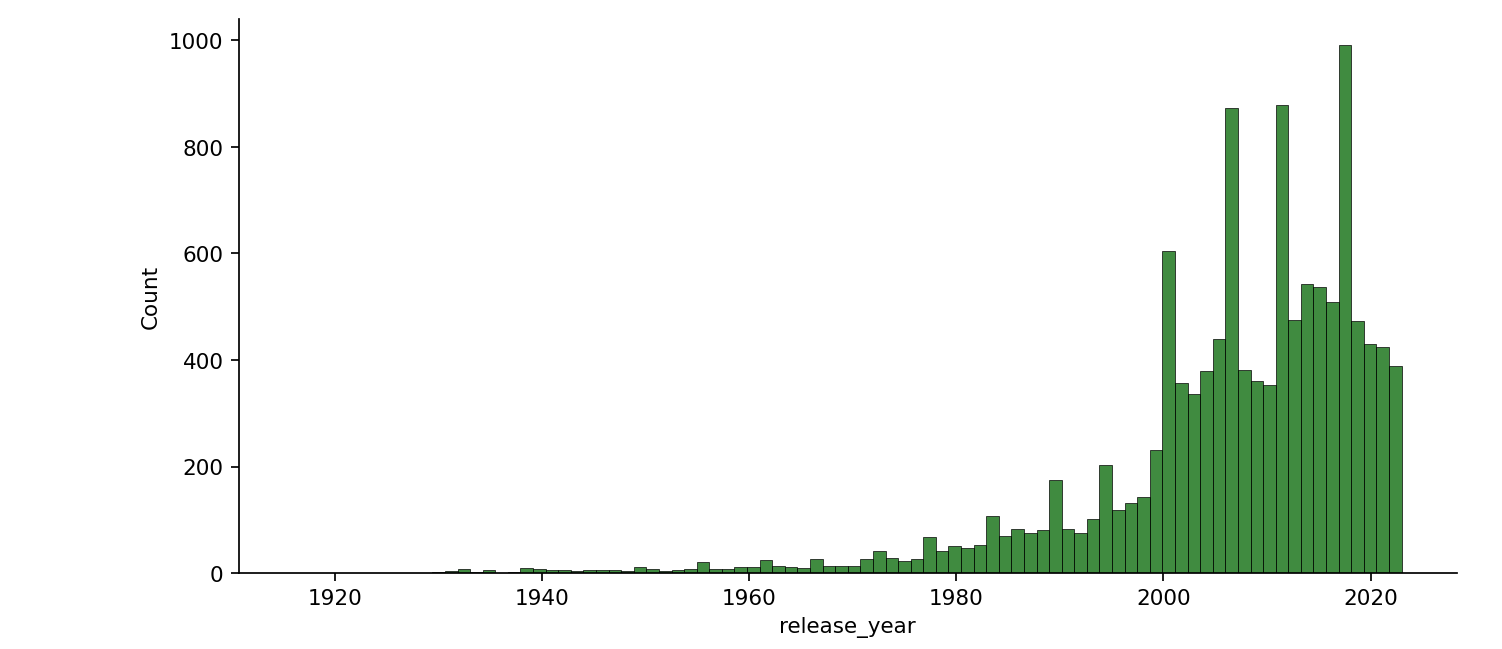

<IPython.core.display.Javascript object>

In [43]:
sns.displot(x=movies.release_year, color="darkgreen")


### Overview

It seems after 1980 there is huge jump on ratings. Before 1980 approx we have onky 100 ratings and

In [44]:
# Top 10 Highest Rated movies of all time

movies.head(10)

,id,metascore,rating,release_date,sort_no,summary,title,user_score,release_year
0,549123,94,TV-14,1989-07-26,101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9,1989
1,522228,94,PG-13,2000-12-08,102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2,2000
2,550614,94,G,1970-09-11,103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5,1970
3,549303,94,TV-PG,1943-01-15,104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2,1943
4,539956,94,PG,2015-06-19,105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7,2015
5,500084,94,R,2004-10-22,106,Two old friends set off on a wine-tasting road...,Sideways,7,2004
6,553537,94,Passed,1945-01-01,107,Young love and childish fears highlight a year...,Meet Me in St. Louis,6.7,1945
7,550723,94,TV-PG,1960-06-15,108,A man tries to rise in his company by letting ...,The Apartment,7.9,1960
8,520814,94,R,1979-08-15,109,"During the Vietnam War, Captain Willard is sen...",Apocalypse Now,8.7,1979
9,549340,94,TV-PG,1950-06-23,110,Notorious gunfighter Jimmy Ringo rides into to...,The Gunfighter,6.8,1950


<IPython.core.display.Javascript object>

In [45]:
movies = movies.sort_values(ascending=False, by="user_score")

<IPython.core.display.Javascript object>

In [46]:
# Here is the list of Top 10 Highest Rated movies of all time.

movies.iloc[:10][["title", "user_score", "release_year", "metascore", "rating"]]

,title,user_score,release_year,metascore,rating
101,The Godfather,9.2,1972,100,R
74,The Lord of the Rings: The Fellowship of the Ring,9,2001,92,PG-13
1162,Star Wars: Episode V - The Empire Strikes Back,9,1980,82,PG
1426,Memento,9,2001,81,R
349,The Godfather: Part II,9,1974,90,R
196,Pulp Fiction,9,1994,94,R
0,Grave of the Fireflies (1988),8.9,1989,94,TV-14
1323,The Shawshank Redemption,8.9,1994,81,R
3607,The Matrix,8.9,1999,73,R
145,Spirited Away,8.9,2002,96,PG


<IPython.core.display.Javascript object>

In [47]:
# Top 10 Lowest rated movies of all time.

movies.iloc[-10:][["title", "user_score", "release_year", "metascore", "rating"]]

,title,user_score,release_year,metascore,rating
13391,Sliver,0.9,1993,38,Unknown
13854,Rape Me,0.9,2001,35,Unknown
6993,Israel: A Home Movie,0.8,2013,63,Unknown
72,Never Rarely Sometimes Always,0.8,2020,92,Unknown
15320,The Garbage Pail Kids Movie,0.7,1987,1,PG
15321,United Passions,0.7,2015,1,Unknown
4370,Fauci,0.6,2021,70,PG-13
1541,Knock Down the House,0.5,2019,80,PG
7289,Funny Boy,0.4,2020,62,Unknown
7520,Unpregnant,0.3,2020,61,PG-13


<IPython.core.display.Javascript object>

#### Overview

As you can see for some movies metascore is good but user_score is not that great. For example Movie `Knock down the House` metascore is 80 and user_score is just 0.5. So we can not decide this type of movie is good to watch or not.

In [99]:
def best_and_worst_movies(rate_wise, year_wise=None):
    """Returns best movie and worst movie based on the user rating."""
    seperate_line = "-" * 25
    best_movie, worst_movie = None, None
    if year_wise:
        filtered_movies = movies.loc[
            (movies["rating"] == rate_wise) & (movies["release_year"] == year_wise)
        ]
        if filtered_movies.empty:
            print("No data available.")
        else:
            best_movie = filtered_movies.iloc[0]
            worst_movie = filtered_movies.iloc[-1]
            print(
                f"For Year: {year_wise}\n{seperate_line}\nBest Movie:\n{best_movie}\n{seperate_line}\nWorst Movie:\n{worst_movie}"
            )
    else:
        filtered_movies = movies.loc[(movies["rating"] == rate_wise)]
        if filtered_movies.empty:
            print("No data available.")
        else:
            best_movie = filtered_movies.iloc[0]
            worst_movie = filtered_movies.iloc[-1]
            print(
                f"For All Time\n{seperate_line}\nBest Movie:\n{best_movie}\n{seperate_line}\nWorst Movie:\n{worst_movie}"
            )

<IPython.core.display.Javascript object>

In [100]:
movies.rating.unique()

array(['R', 'PG-13', 'PG', 'TV-14', 'TV-MA', 'G', 'Unknown', 'TV-PG',
       'Passed', 'M', 'TV-G', 'Approved', 'Open', 'X', 'NC-17', 'GP',
       'M/PG', 'NR', 'TV-Y7-FV', 'MA-17', 'PG--13', 'TV-Y7', 'PG-13`'],
      dtype=object)

<IPython.core.display.Javascript object>

In [102]:
best_and_worst_movies("Unknown")

For All Time
-------------------------
Best Movie:
id                                                         519276
metascore                                                      92
rating                                                    Unknown
release_date                                  1999-12-31 00:00:00
sort_no                                                       155
summary         This fiction-documentary hybrid uses a real-li...
title                                                    Close-Up
user_score                                                    8.8
release_year                                                 1999
Name: 54, dtype: object
-------------------------
Worst Movie:
id                                                         553359
metascore                                                      62
rating                                                    Unknown
release_date                                  2020-12-10 00:00:00
sort_no                     

<IPython.core.display.Javascript object>

### Other DataFrames

In [108]:
games.head(5)

,id,metascore,platform,release_date,sort_no,summary,title,user_score
0,543718,91,PC,"August 18, 2020",301,"From light planes to wide-body jets, fly highl...",Microsoft Flight Simulator,7.1
1,555108,91,PC,"December 8, 2022",302,"Take up your sword, channel your magic or boar...",Chained Echoes,8.7
2,106820,91,PlayStation 2,"November 7, 2005",303,"Strap on your Guitar Hero SG controller, plug-...",Guitar Hero,8.5
3,110775,91,PC,"November 13, 2008",304,"Players last visited Northrend in ""Warcraft II...",World of Warcraft: Wrath of the Lich King,7.7
4,142864,91,Wii,"October 26, 2010",305,Rock Band returns with the third iteration of ...,Rock Band 3,6.8


<IPython.core.display.Javascript object>

In [109]:
tvs.head(5)

,id,metascore,release_date,sort_no,summary,title,user_score
0,72329,99,"October 26, 2016",1,Daniel tries to start a new life outside of Pa...,Rectify: Season 4,8.2
1,738,99,"July 19, 1995",2,Comic Garry Shandling draws upon his own talk ...,The Larry Sanders Show: Season 4,4.8
2,51124,99,"September 19, 1995",3,One of several crime and law dramas created by...,Murder One: Season 1,4.6
3,740,99,"March 15, 1998",4,Comic Garry Shandling draws upon his own talk ...,The Larry Sanders Show: Season 6,4.1
4,46560,99,"July 15, 2012",5,The final season for the award-winning drama b...,Breaking Bad: Season 5,9.7


<IPython.core.display.Javascript object>

In [110]:
music.head(5)

,id,artist,metascore,release_date,sort_no,summary,title,user_score
0,13354,Wadada Leo Smith,99,"May 22, 2012",1,The four-disc set from the jazz trumpeter was ...,Ten Freedom Summers,4.2
1,37516,Fiona Apple,98,"April 17, 2020",2,The fifth full-length studio release for the a...,Fetch the Bolt Cutters,8.1
2,1671,Brian Wilson,97,"September 28, 2004",3,"Well, better 37 years late than never. Origina...",SMiLE,7.9
3,1538,Loretta Lynn,97,"April 27, 2004",4,It's been over 40 years since she released her...,Van Lear Rose,8.4
4,22163,Kendrick Lamar,96,"March 16, 2015",5,The third full-length studio release from the ...,To Pimp A Butterfly,8.9


<IPython.core.display.Javascript object>

#### Conclusion

Based on the requirements we can filter out data from this other dataframes same as movied dataframe. We can also use the same methodology on these dataframe which we have applied earlier on movies dataframe.

#### ------------------------------------------------------------------------------------------------------------------------------------------